# IMPORTING LIBRARIES

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn. linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [3]:
data_df = pd.read_csv("/content/diamonds.csv")
data_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,27188.4,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,27188.4,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,27271.8,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,27855.6,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,27939.0,4.34,4.35,2.75


This classic dataset contains the prices and other attributes of almost 54,000 diamonds. There are 10 attributes included in the dataset including the target ie. price.

* carat (0.2-5.01): The carat is the diamond’s physical weight measured in metric carats. One carat equals 0.20 gram and is subdivided into 100 points.
* cut (Fair, Good, Very Good, Premium, Ideal): The quality of the cut. The more precise the diamond is cut, the more captivating the diamond is to the eye thus of high grade.
* color (from J (worst) to D (best)): The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.
* clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)): Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.
* depth (43-79): It is the total depth percentage which equals to z / mean(x, y) = 2 * z / (x + y). The depth of the diamond is its height (in millimetres) measured from the culet (bottom tip) to the table (flat, top surface) as referred in the labelled diagram above.
* table (43-95): It is the width of the top of the diamond relative to widest point. It gives diamond stunning fire and brilliance by reflecting lights to all directions which when seen by an observer, seems lustrous.
* price ($$326 - $18826): It is the price of the diamond in US dollars. It is our very target column in the dataset.
* x (0 - 10.74): Length of the diamond (in mm)
* y (0 - 58.9): Width of the diamond (in mm)
* z (0 - 31.8): Depth of the diamond (in mm)

# EDA

In [4]:
# Checking for missing values and categorical variables in the dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  float64
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 4.5+ MB


In [5]:
data_df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [6]:
data_df.duplicated().sum()

0

In [7]:
data_df.drop_duplicates(inplace=True)

# Visualizations:

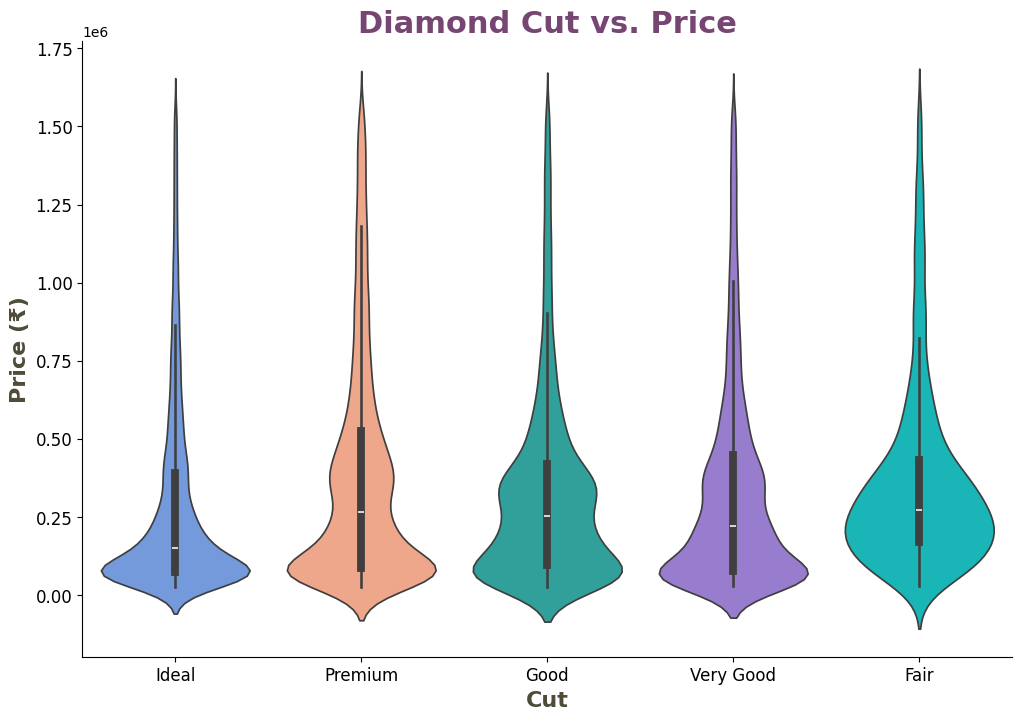

In [24]:
plt.figure(figsize=(12, 8))
# Define custom color palette
cols = ["#6495ED", "#FFA07A", "#20B2AA", "#9370DB", "#00CED1"]

# Create the violin plot
ax = sns.violinplot(x="cut", y="price", data=data_df, palette=cols, scale="count")

# Set title with adjusted font size and color
ax.set_title("Diamond Cut vs. Price", color="#774571", fontsize=22, fontweight='bold')

# Set label for y-axis with adjusted font size and color
ax.set_ylabel("Price (₹)", color="#4e4c39", fontsize=16, fontweight='bold')

# Set label for x-axis with adjusted font size and color
ax.set_xlabel("Cut", color="#4e4c39", fontsize=16, fontweight='bold')

# Adjust tick parameters
ax.tick_params(axis='x', labelsize=12)  # x-axis labels font size
ax.tick_params(axis='y', labelsize=12)  # y-axis labels font size

# Adjust spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


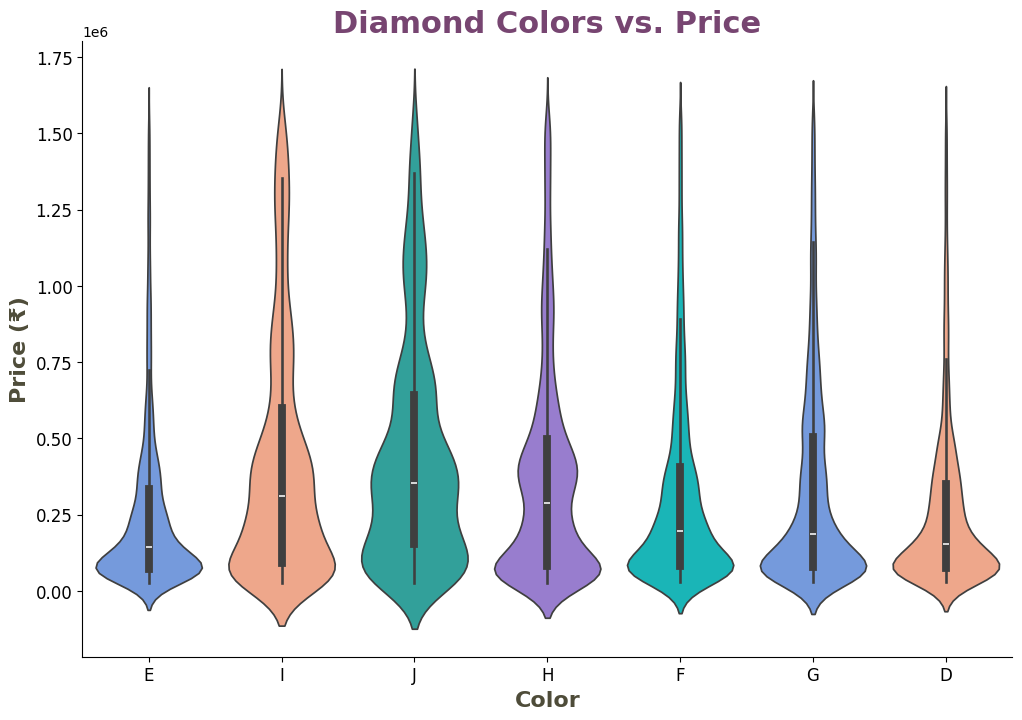

In [26]:
plt.figure(figsize=(12, 8))  # Set the figure size
cols = ["#6495ED", "#FFA07A", "#20B2AA", "#9370DB", "#00CED1"]  # Custom color palette

# Create the violin plot
ax = sns.violinplot(x="color", y="price", data=data_df, palette=cols, scale="count")

# Set title with adjusted font size, color, and weight
ax.set_title("Diamond Colors vs. Price", color="#774571", fontsize=22, fontweight='bold')

# Set label for y-axis with adjusted font size, color, and weight
ax.set_ylabel("Price (₹)", color="#4e4c39", fontsize=16, fontweight='bold')

# Set label for x-axis with adjusted font size, color, and weight
ax.set_xlabel("Color", color="#4e4c39", fontsize=16, fontweight='bold')

# Adjust tick parameters
ax.tick_params(axis='x', labelsize=12)  # x-axis labels font size
ax.tick_params(axis='y', labelsize=12)  # y-axis labels font size

# Adjust spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


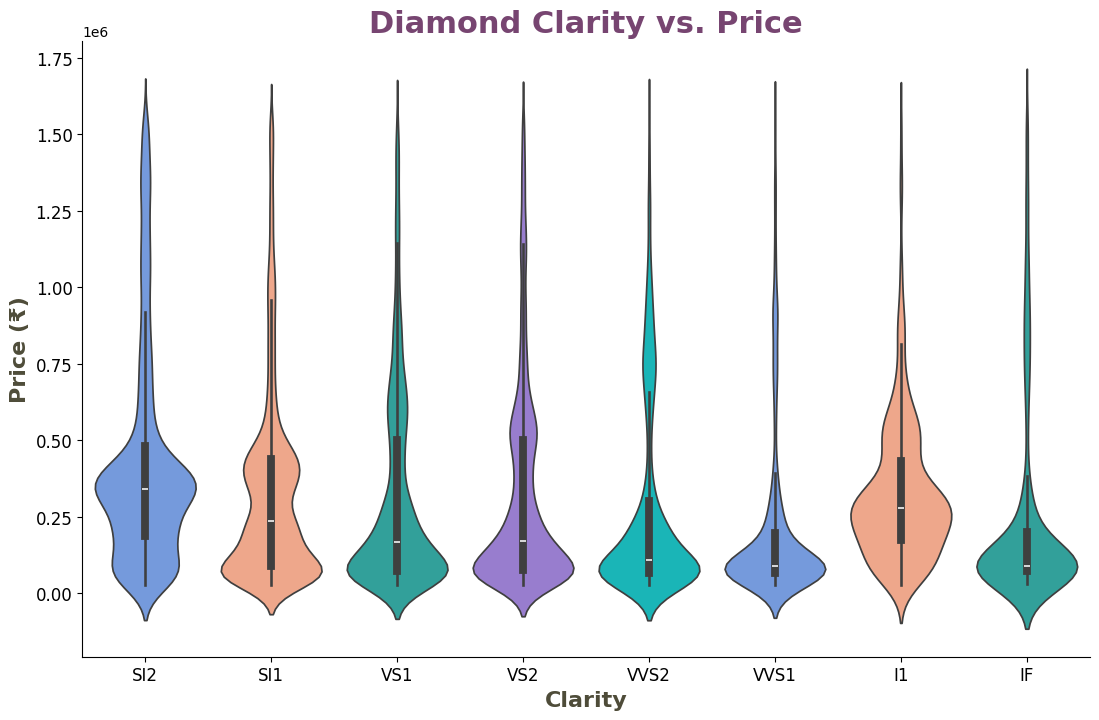

In [27]:
plt.figure(figsize=(13, 8))  # Set the figure size
cols = ["#6495ED", "#FFA07A", "#20B2AA", "#9370DB", "#00CED1"]  # Custom color palette

# Create the violin plot
ax = sns.violinplot(x="clarity", y="price", data=data_df, palette=cols, scale="count")

# Set title with adjusted font size, color, and weight
ax.set_title("Diamond Clarity vs. Price", color="#774571", fontsize=22, fontweight='bold')

# Set label for y-axis with adjusted font size, color, and weight
ax.set_ylabel("Price (₹)", color="#4e4c39", fontsize=16, fontweight='bold')

# Set label for x-axis with adjusted font size, color, and weight
ax.set_xlabel("Clarity", color="#4e4c39", fontsize=16, fontweight='bold')

# Adjust tick parameters
ax.tick_params(axis='x', labelsize=12)  # x-axis labels font size
ax.tick_params(axis='y', labelsize=12)  # y-axis labels font size

# Adjust spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

<Figure size 1000x800 with 0 Axes>

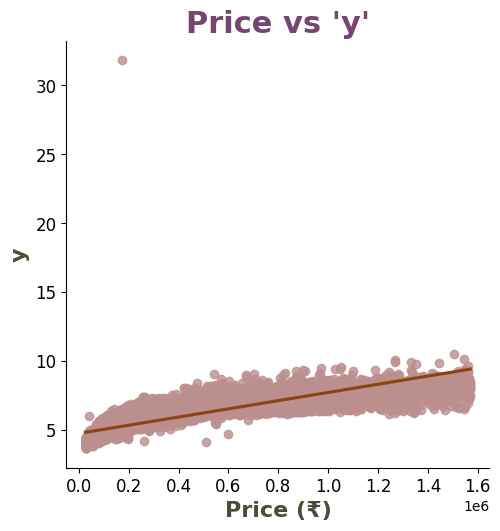

In [29]:
# Set figure size
plt.figure(figsize=(10, 8))

# Create the lmplot
lm = sns.lmplot(x="price", y="y", data=data_df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})

# Set title with adjusted font size, color, and weight
plt.title("Price vs 'y'", color="#774571", fontsize=22, fontweight='bold')

# Set label for y-axis with adjusted font size, color, and weight
plt.ylabel("y", color="#4e4c39", fontsize=16, fontweight='bold')

# Set label for x-axis with adjusted font size, color, and weight
plt.xlabel("Price (₹)", color="#4e4c39", fontsize=16, fontweight='bold')

# Adjust tick parameters
plt.xticks(fontsize=12)  # x-axis ticks font size
plt.yticks(fontsize=12)  # y-axis ticks font size

# Adjust spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

<Figure size 1000x800 with 0 Axes>

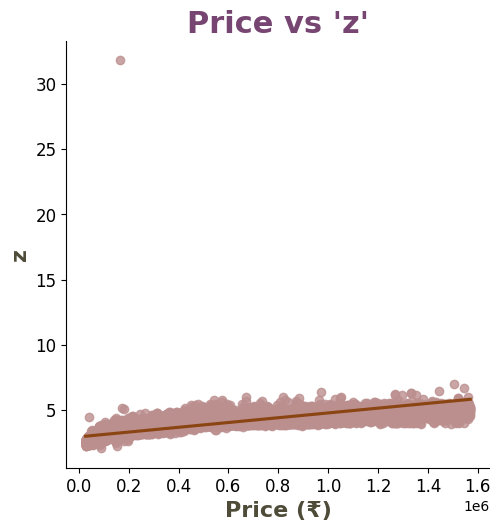

In [30]:
# Set figure size
plt.figure(figsize=(10, 8))

# Create the lmplot
lm = sns.lmplot(x="price", y="z", data=data_df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})

# Set title with adjusted font size, color, and weight
plt.title("Price vs 'z'", color="#774571", fontsize=22, fontweight='bold')

# Set label for y-axis with adjusted font size, color, and weight
plt.ylabel("z", color="#4e4c39", fontsize=16, fontweight='bold')

# Set label for x-axis with adjusted font size, color, and weight
plt.xlabel("Price (₹)", color="#4e4c39", fontsize=16, fontweight='bold')

# Adjust tick parameters
plt.xticks(fontsize=12)  # x-axis ticks font size
plt.yticks(fontsize=12)  # y-axis ticks font size

# Adjust spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

<Figure size 1000x800 with 0 Axes>

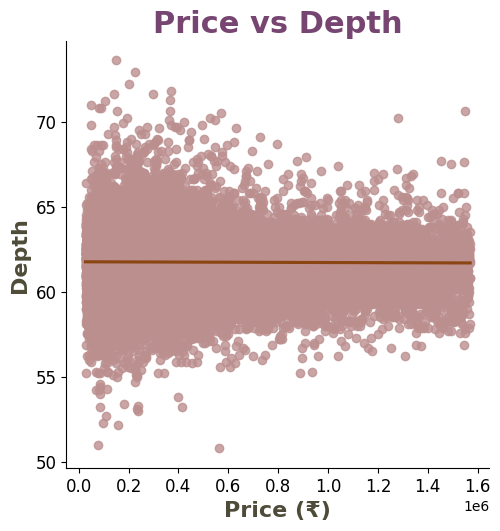

In [31]:
# Set figure size
plt.figure(figsize=(10, 8))

# Create the lmplot
lm = sns.lmplot(x="price", y="depth", data=data_df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})

# Set title with adjusted font size, color, and weight
plt.title("Price vs Depth", color="#774571", fontsize=22, fontweight='bold')

# Set label for y-axis with adjusted font size, color, and weight
plt.ylabel("Depth", color="#4e4c39", fontsize=16, fontweight='bold')

# Set label for x-axis with adjusted font size, color, and weight
plt.xlabel("Price (₹)", color="#4e4c39", fontsize=16, fontweight='bold')

# Adjust tick parameters
plt.xticks(fontsize=12)  # x-axis ticks font size
plt.yticks(fontsize=12)  # y-axis ticks font size

# Adjust spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

<Figure size 1000x800 with 0 Axes>

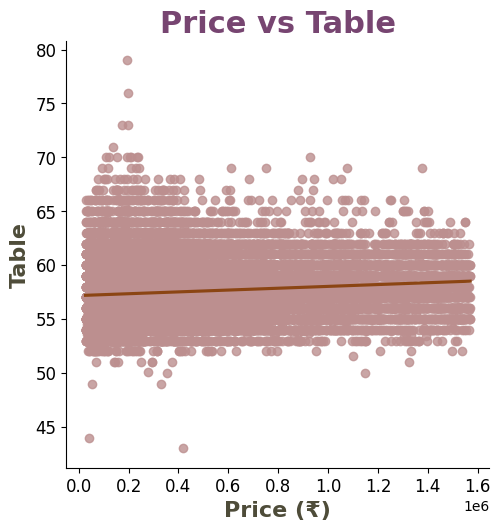

In [33]:
# Set figure size
plt.figure(figsize=(10, 8))

# Create the lmplot
lm = sns.lmplot(x="price", y="table", data=data_df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})

# Set title with adjusted font size, color, and weight
plt.title("Price vs Table", color="#774571", fontsize=22, fontweight='bold')

# Set label for y-axis with adjusted font size, color, and weight
plt.ylabel("Table", color="#4e4c39", fontsize=16, fontweight='bold')

# Set label for x-axis with adjusted font size, color, and weight
plt.xlabel("Price (₹)", color="#4e4c39", fontsize=16, fontweight='bold')

# Adjust tick parameters
plt.xticks(fontsize=12)  # x-axis ticks font size
plt.yticks(fontsize=12)  # y-axis ticks font size

# Adjust spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

In [15]:
# Removing the feature "Unnamed"
data_df = data_df.drop(["Unnamed: 0"], axis=1)
data_df.shape

(53940, 10)

In [16]:
# Removing the datapoints having min 0 value in either x, y or z features
data_df = data_df.drop(data_df[data_df["x"]==0].index)
data_df = data_df.drop(data_df[data_df["y"]==0].index)
data_df = data_df.drop(data_df[data_df["z"]==0].index)
data_df.shape

(53920, 10)

# Removing the Outliers

In [17]:
# Dropping the outliers (since we have huge dataset) by defining appropriate measures across features
data_df = data_df[(data_df["depth"]<75)&(data_df["depth"]>45)]
data_df = data_df[(data_df["table"]<80)&(data_df["table"]>40)]
data_df = data_df[(data_df["x"]<40)]
data_df = data_df[(data_df["y"]<40)]
data_df = data_df[(data_df["z"]<40)&(data_df["z"]>2)]
data_df.shape

(53909, 10)

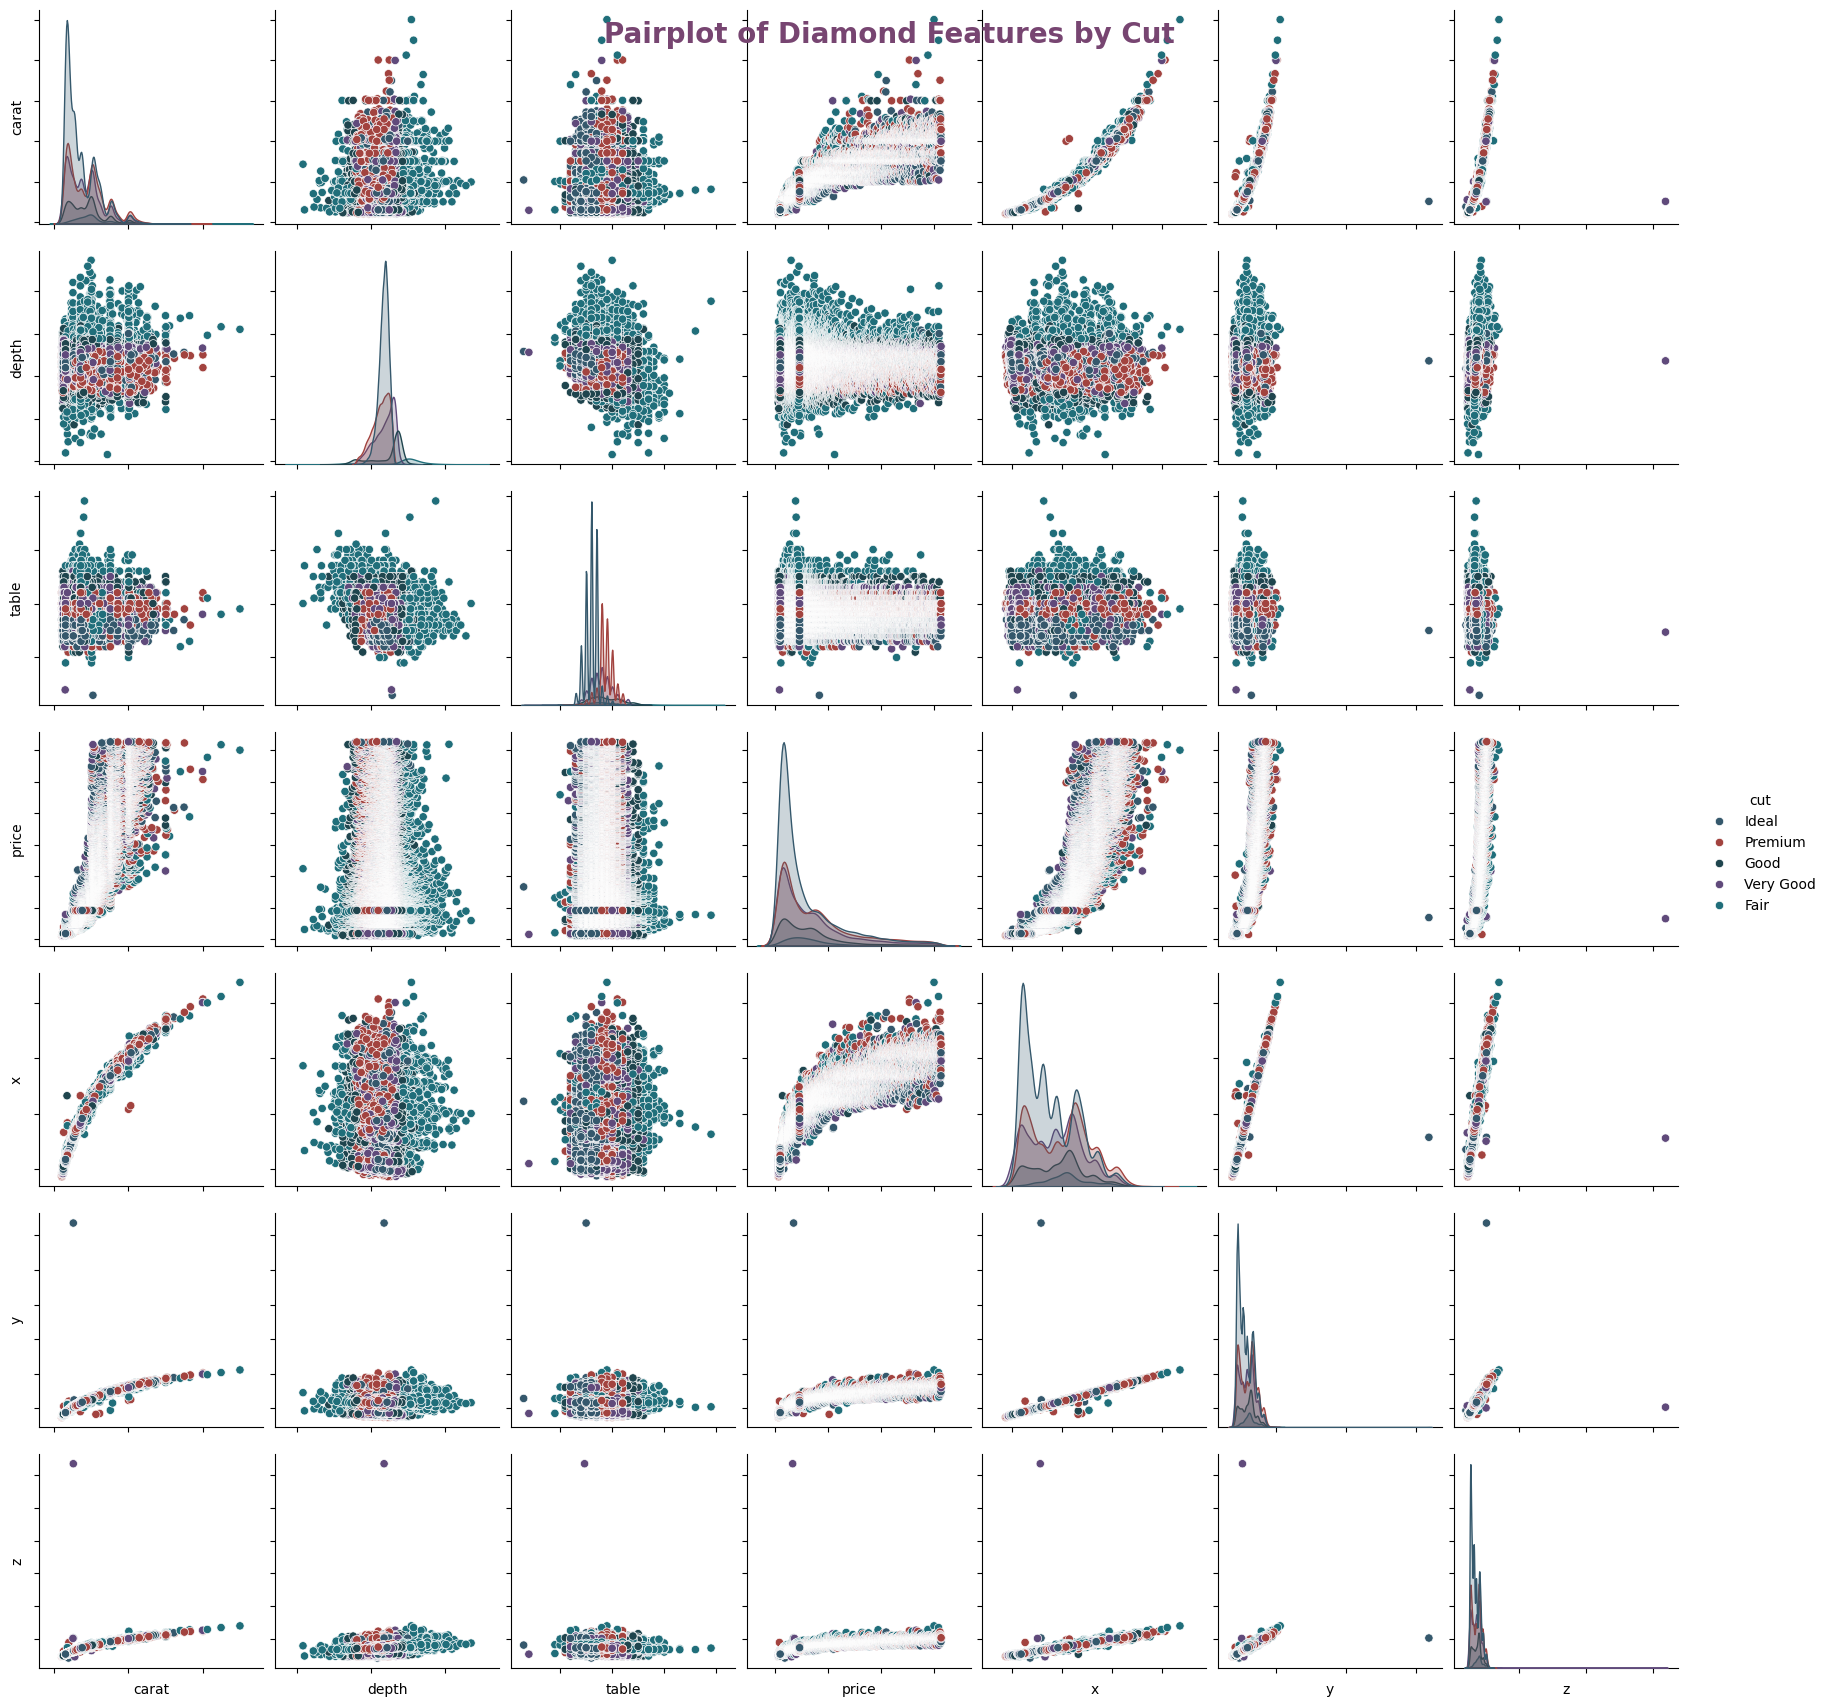

In [43]:
# Define custom color palette with darker shades
shade = ["#35586C", "#A2433F", "#1F454E", "#604A7B", "#206E7A"]

# Create the pairplot
pair_plot = sns.pairplot(data_df, hue="cut", palette=shade)

# Set title
pair_plot.fig.suptitle("Pairplot of Diamond Features by Cut", color="#774571", fontsize=20, fontweight='bold')

# Adjust tick parameters
for ax in pair_plot.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

# Adjust spines
for ax in pair_plot.axes.flatten():
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()

# Encode the categorical columns

In [18]:
# Making a copy to keep original data in its form intact
data1 = data_df.copy()

# Applying label encoder to columns with categorical data
columns = ['cut','color','clarity']
label_encoder = LabelEncoder()
for col in columns:
    data1[col] = label_encoder.fit_transform(data1[col])
data1.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,5.390900e+04,53909.000000,53909.000000,53909.000000
mean,0.797617,2.553396,2.593964,3.835575,61.749743,57.455852,3.278048e+05,5.731441,5.733764,3.539994
std,0.473759,1.027444,1.701283,1.724540,1.420093,2.226169,3.325280e+05,1.119369,1.116891,0.702085
min,0.200000,0.000000,0.000000,0.000000,50.800000,43.000000,2.718840e+04,3.730000,3.680000,2.060000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,7.914660e+04,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2.001600e+05,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,4.438548e+05,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,73.600000,79.000000,1.569838e+06,10.740000,31.800000,31.800000


# Split the Data

In [19]:
# Defining the independent and dependent variables
X= data1.drop(["price"],axis =1)
y= data1["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

# Modeling

In [20]:
# Building pipelines of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr",LinearRegression())])

pipeline_lasso=Pipeline([("scalar2", StandardScaler()),
                      ("lasso",Lasso())])

pipeline_dt=Pipeline([("scalar3",StandardScaler()),
                     ("dt",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar4",StandardScaler()),
                     ("rf",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar5",StandardScaler()),
                     ("kn",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar6",StandardScaler()),
                     ("xgb",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_lasso, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipeline_dict = {0: "LinearRegression", 1: "Lasso", 2: "DecisionTree", 3: "RandomForest",4: "KNeighbors", 5: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [21]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=12)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipeline_dict[i], -1 * cv_score.mean()))

LinearRegression: 124488.096250 
Lasso: 121411.677374 
DecisionTree: 62479.637783 
RandomForest: 45989.502590 
KNeighbors: 67693.716618 
XGBRegressor: 45740.069656 


# Model prediction on test data with XGBClassifier which gave us the least RMSE

In [22]:
pred = pipeline_xgb.predict(X_test)
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

R^2: 0.981064323419003
Adjusted R^2: 0.9810485026717667
